# PROYECTO FINAL

**Desarrollado por:**  
Johan Díaz  
Héctor Sanjuan  
Miguel Lugo  
Luis David Peñaranda

---

## Índice
    1. Análisis Exploratorio de Datos (EDA)
        1.1. Carga de los datos 
        1.2. Análisis de los datos 
            1.2.1 Datos faltantes
        1.3. Visualización de la variable objetivo
        1.4  Análisis univariado de las variables numéricas 
        1.5. Variables numéricas vs. target  
        1.6  Variables categóricas vs. Target 
        1.7. Correlación  
        1.8. Conclusión del Análisis Exploratorio de Datos

    2. Modelo de regresión logística
        2.1 Búsqueda del mejor parámetro
        2.2 Implementación del modelo con el mejor parámetro y métricas de evaluación
        2.3 Conclusiones del modelo

    3. Modelo k-NN
        3.1 Búsqueda del mejor parámetro 
        3.2 Implementación del modelo con el mejor parámetro y métricas de evaluación
        3.3 Conclusiones del modelo
        3.4 Modelo sin balanceo




ID: Unique identifier for each entry in the dataset.

Customer_ID: Identifier for each customer.

Month: Month of data collection.

Name: Name of the customer.

Age: Age of the customer.

SSN: Social Security Number of the customer.

Occupation: Occupation of the customer.

Annual_Income: Annual income of the customer.

Monthly_Inhand_Salary: Monthly salary after deductions.

Num_Bank_Accounts: Number of bank accounts the customer has.

Num_Credit_Card: Number of credit cards the customer has.

Interest_Rate: Interest rate applied on loans.

Num_of_Loan: Number of loans the customer has.

Type_of_Loan: Type of loan taken by the customer.

Delay_from_due_date: Number of days delayed from due date for payments.

Num_of_Delayed_Payment: Number of delayed payments made by the customer.

Changed_Credit_Limit: Indicates if the credit limit has been changed.

Num_Credit_Inquiries: Number of credit inquiries made by the customer.

Credit_Mix: Mix of different types of credit accounts held by the customer.

Outstanding_Debt: Amount of outstanding debt.

Credit_Utilization_Ratio: Ratio of credit used to credit available.

Credit_History_Age: Age of credit history.

Payment_of_Min_Amount: Indicates if minimum payment amount is met.

Total_EMI_per_month: Total Equated Monthly Installment (EMI) paid by the customer.

Amount_invested_monthly: Amount invested monthly by the customer.

Payment_Behaviour: Payment behavior of the customer.

Monthly_Balance: Monthly balance in the account.

Credit_Score: Target variable - credit score of the customer.

## 1. Análisis Exploratorio de Datos (EDA)

Esta etapa nos permitirá comprender mejor la distribución de las variables, identificar patrones, relaciones entre características, y posibles diferencias entre los grupos de estudio. El objetivo es obtener información relevante que nos oriente en la construcción y evaluación de los modelos predictivos.

### 1.1. Carga de los datos

Para empezar, necesitamos cargar los datos. Para que este notebook lo pueda usar cualquiera sin descargar archivos manualmente, hemos subido el datastet a GitHub, donde solo es necesario obtener el `raw` de donde reposa el archivo. Así el proceso es automático y fácil.

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [370]:
df= pd.read_csv('https://raw.githubusercontent.com/luispenaranda08/Integrative-Machine-Learning-Project/refs/heads/Hector/train.csv')

### 1.2. Análisis de los datos

En esta sección inspeccionamos las primeras filas y el tipo de variables. Esta información nos permite identificar posibles problemas de calidad de los datos y tomar decisiones informadas sobre el preprocesamiento.


Ahora que los datos están cargados, vamos a hacer una revisión rápida para empezar a conocer los datos.

In [371]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)       # Muestra todas las filas

In [372]:
print("\nVista previa del DataFrame:")
df.head()



Vista previa del DataFrame:


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [373]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [374]:
print("Resumen técnico del DataFrame:")
df.info()

Resumen técnico del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan  

En la primera etapa de nuestro Análisis Exploratorio de Datos (EDA), examinamos la estructura general del conjunto de datos.

-   **Tamaño del conjunto de datos:** Descubrimos que el conjunto de datos contiene 100,000 registros y 27 variables.
-   **Tipos de datos:** Encontramos que las variables se dividen en tipos numéricos (`float64`, `int64`) y categóricos (`object`). 
-   **Valores faltantes:** Un hallazgo crucial es la presencia de valores nulos o faltantes en varias columnas. 


#### 1.2.1 Corrección de los datos

Si analizamos más a detalle la salida del `.info()` que acabamos de ver, notaremos que variables como `Age`, `Annual_Income` o `Num_of_Loan` se encuentran registradas como tipo `object` en vez de ser tipo entero o flotante. Esto se debe a que gran parte de las variables cuenta con errores en el registro de sus datos que debe ser corregido antes de comenzar a analizarlos.

Los siguientes códigos de esta sección, entonces, serán implementados con el objetivo de corregir todos estos registros erróneos en las variables que encontramos que los tenían.

Primero, eliminemos las variables que no serán utilizadas en proyecto.

In [375]:
df=df.drop(columns=["ID","Customer_ID", "Name", "SSN", "Month"])

Comprobemos que se hayan eliminado correctamente:

In [376]:
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Primero, corregimos los registros de las variables que vimos que tienen símbolos que no deberían estar en una variable numérica:

In [377]:
int_cols=["Age", "Annual_Income","Num_of_Loan", "Num_of_Delayed_Payment","Outstanding_Debt" ]

In [378]:
for col in int_cols:
    df[col] = df[col].astype(str).str.replace(r'[^0-9.\-]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors="coerce")

    

Luego, vimos que para la variable `Occupation`, los valores faltantes se registraron así: `_______`, por lo que los convertimos en `NA`.

In [379]:
print(df["Occupation"].value_counts())

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


In [380]:
df["Occupation"]=df["Occupation"].replace("_______", np.nan)

Como se pudo ver en el `.head()`, esta variable contiene los tipos de créditos solicitados por cada cliente. En total se tienen 9 tipos de créditos (contando los que no fueron específicados como uno solo), entonces cada registro tenía la combinación específica de cada tipo de crédito del cliente, lo que a la larga termina dando una lista de combinaciones posibles muy grande y poco eficiente al momento de entrenar los modelos.

Por esto, decidimos definir 9 variables binarias, que marquen si el cliente solicitó el tipo de crédito de la variable en específico o no.

Las variables son:
- `Not Specified`
- `Credit-Builder Loan`
- `Personal Loan`
- `Debt Consolidation Loan`
- `Student Loan`
- `Payday Loan`
- `Mortgage Loan`
- `Auto Loan`
- `Home Equity Loan`

In [381]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(r'\s*,\s*', ',', regex=True)


In [382]:
loan_types = [
    'Not Specified',
    'Credit-Builder Loan',
    'Personal Loan',
    'Debt Consolidation Loan',
    'Student Loan',
    'Payday Loan',
    'Mortgage Loan',
    'Auto Loan',
    'Home Equity Loan'
]

Dado que la variable `Type_of_Loan` cuenta con valores faltantes, decidimos realizar una imputación temprana para poder registrar correctamente las variables nuevas.

Para esto, de la clase de Visualización de datos, tomamos el método de imputación de categóricas `hot_deck`, el cual sustituye con uno tomado al azar de registros similares.

In [383]:
def hot_deck_group(df, col, group, random_state=42):
    rng = np.random.default_rng(random_state)
    out = df[col].copy()
    for g, sub in df.groupby(group):
        pool = sub[col].dropna().to_numpy()
        idx = sub.index[sub[col].isna()]
        if pool.size > 0 and len(idx) > 0:
            out.loc[idx] = rng.choice(pool, size=len(idx), replace=True)
    return out


In [384]:
df_imp = df.copy()

In [385]:
df_imp['Type_of_Loan'] = hot_deck_group(df_imp, 'Type_of_Loan', 'Credit_Mix')

Además, haciendo uso de la función `eval_cat`, evaluamos por medio de una prueba de chi-cuadrado si la imputación hecha no cambia la distribución de la variable imputada.

In [386]:
from scipy.stats import chi2_contingency
def eval_cat(df,df_imputado, var):    
    orig_counts = df[var].value_counts().sort_index()
    imp_counts = df_imputado[var].value_counts().sort_index()

    
    orig_counts, imp_counts = orig_counts.align(imp_counts, fill_value=0)

    tabla = pd.DataFrame({"original": orig_counts, "imputada": imp_counts}).T

    chi2, p, dof, expected = chi2_contingency(tabla)

    print(f"=== {var} ===")
    print(f"Chi2 = {chi2:.3f}, gl = {dof}, p = {p:.4f} → ",
          "No se rechaza H0 (distribuciones iguales)" if p > 0.05 else "Se rechaza H0 (distribuciones diferentes)")
    print("-"*60)

In [387]:
eval_cat(df,df_imp, 'Type_of_Loan')

=== Type_of_Loan ===
Chi2 = 400.955, gl = 6259, p = 1.0000 →  No se rechaza H0 (distribuciones iguales)
------------------------------------------------------------


Dado que el p-valor de la prueba chi-cuadrado es mayor que mi nivel de significancia (0.05), no existe evidencia suficiente para rechazar la hipótesis de igualdad de las distribuciones.

Ahora, revisamos que se haya imputado la variable, es decir, que ya no hayan valores faltantes.

In [388]:
df["Type_of_Loan"].isna().sum()

11408

In [389]:
df_imp["Type_of_Loan"].isna().sum()

0

Dado que la imputación se realizó correctamente y es estadísticamente válida, la guardamos en el dataframe original.

In [390]:
df["Type_of_Loan"]=df_imp["Type_of_Loan"]

Y procedemos con la creación de las variables binarias.

In [391]:
for loan in loan_types:
    df[loan] = df['Type_of_Loan'].apply(lambda x: 1 if loan in x else 0)

Como ya no necesitamos la información de `Type_of_Loan`, la retiramos del análisis para evitar la repetición de la misma información.

In [392]:
df.drop(columns=["Type_of_Loan"], inplace=True)

Además, recordemos que contamos con la variable `Num_of_Loan`, que cuenta el número de créditos solicitados por el cliente, pero al tener las variables binarias que cuentan con la misma información, también puede ser retirada del análisis.

In [393]:
df.drop(columns=["Num_of_Loan"], inplace=True)

En el caso de la variable `Credit_Mix`, el registro `_` nos indica que no hubo información del cliente, por lo que creamos una categoría llamada `Not Specified` para dejarlo más claro.

In [394]:
print(df["Credit_Mix"].value_counts())
df["Credit_Mix"]=df["Credit_Mix"].replace("_", "Not Specified")
df["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64


Credit_Mix
Standard         36479
Good             24337
Not Specified    20195
Bad              18989
Name: count, dtype: int64

In [395]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

Para `Payment_Behaviour`, se tiene un claro error en el registro de una de las categorías, por lo que lo cambiamos a valor faltante.

In [396]:
df["Payment_Behaviour"].value_counts()
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8", np.nan)

Y para las variables `Changed_Credit_Limit`, `Amount_invested_monthly` y `Monthly_Balance`, se realiza un proceso de corrección de errores en los registros, cambiando estos errores por un `0`.

Para `Changed_Credit_Limit`, se pone 0 ya que puede significar que el límite del crédito no sufrió cambios.

In [397]:
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].replace("_",0)
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].astype(float)

Para `Amount_invested_monthly`, se pone 0 ya que este error puede significar que este cliente no invierte mensualmente.

In [398]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].replace("__10000__",0.0)
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].astype(float)

Y para `Monthly_Balance` se puso como valor faltante los errores claros de registro.

In [399]:
df["Monthly_Balance"]=df["Monthly_Balance"].replace("__-333333333333333333333333333__",np.nan)
df["Monthly_Balance"]=df["Monthly_Balance"].astype(float)

Por último, decidimos cambiar el registro de la variable `Credit_History_Age`, para que en vez de dar los años y meses de vida crediticia del cliente escritos en texto, escriba su equivalente en número de años:

In [400]:

def credit_age_to_float(value):
    if pd.isna(value):
        return np.nan  # Mantiene los valores faltantes
    match = re.match(r"(\d+)\s*Years?\s*and\s*(\d+)\s*Months?", str(value))
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years + months / 12
    return np.nan  # Si no coincide el patrón


df["Credit_History_Age"] = df["Credit_History_Age"].apply(credit_age_to_float).round(2)

Luego de estas correcciones, podemos seguir con el EDA.

#### 1.2.2 De regreso al análisis

Primero, limpiemos un poco los nombres de las variables:

In [401]:
import janitor
df=df.clean_names()

Ahora, veamos de nuevo la información del dataset con `.info()`.

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       100000 non-null  int64  
 1   occupation                92938 non-null   object 
 2   annual_income             100000 non-null  float64
 3   monthly_inhand_salary     84998 non-null   float64
 4   num_bank_accounts         100000 non-null  int64  
 5   num_credit_card           100000 non-null  int64  
 6   interest_rate             100000 non-null  int64  
 7   delay_from_due_date       100000 non-null  int64  
 8   num_of_delayed_payment    92998 non-null   float64
 9   changed_credit_limit      100000 non-null  float64
 10  num_credit_inquiries      98035 non-null   float64
 11  credit_mix                100000 non-null  object 
 12  outstanding_debt          100000 non-null  float64
 13  credit_utilization_ratio  100000 non-null  fl

De esta salida podemos concluir lo siguiente:



Para continuar de manera mas sencilla con el análisis, hicimos una lista que contiene cada variable numérica por un lado, y cada variable categórica por otro:

In [403]:
num_cols=['age', 'annual_income','monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

cat_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour', 'not_specified',
          'credit_builder_loan','personal_loan','debt_consolidation_loan','student_loan',
          'payday_loan','mortgage_loan','auto_loan','home_equity_loan']

In [404]:
print("\nResumen de las variables numéricas:")
display(df[num_cols].describe().T)


Resumen de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
age,100000.0,110.649700,6.862447e+02,-500.000000,24.000000,33.000000,42.000000,8.698000e+03
annual_income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
monthly_inhand_salary,84998.0,4194.170850,3.183686e+03,303.645417,1625.568229,3093.745000,5957.448333,1.520463e+04
num_bank_accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
num_credit_card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
interest_rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
num_of_delayed_payment,92998.0,30.923342,2.260319e+02,-3.000000,9.000000,14.000000,18.000000,4.397000e+03
changed_credit_limit,100000.0,10.171791,6.880628e+00,-6.490000,4.970000,9.250000,14.660000,3.697000e+01
num_credit_inquiries,98035.0,27.754251,1.931773e+02,0.000000,3.000000,6.000000,9.000000,2.597000e+03


ESTO ES DEL DATASET ANTERIOR, FALTA ACTUALIZACION


A partir de la tabla de estadísticas descriptivas (describe), realizamos las siguientes observaciones:

1.  **Valores Faltantes (Nulos):**
    -   Confirmamos la presencia de valores faltantes en `blood_pressure`, `heart_rate`, `insulin`, `daily_steps`, `income` y `gene_marker_flag`.

2.  **Identificación de Datos Inconsistentes:**
    -   Descubrimos valores imposibles en algunas variables:
        -   `insulin`,`sugar_intake` y `daily_supplement_dosage` tienen valores mínimos negativos (-6.794483, -27.88 y -9.99, respectivamente), lo cual es un claro error de datos. Estos valores deberán ser eliminados o corregidos.
    -   Observamos la distribución de otras variables:
        -   `income` muestra un rango muy amplio, con un mínimo de 500 y un máximo de 1.2 millones. Esto indica una alta variabilidad en los ingresos y podría haber valores atípicos que necesiten ser examinados.
        -   `screen_time` tiene un mínimo de 0.5 horas y un máximo de 16 horas. La media (6.02) y la mediana (5.0) están cerca, pero el máximo sugiere que algunos individuos pasan una cantidad de tiempo en pantalla significativamente alta.

3.  **Distribución de las Variables:**
    -   Las variables `stress_level` y `mental_health_score` (ambas en una escala de 0 a 10) tienen una media de aproximadamente 5, lo que indica que los datos están bastante centrados en la mitad de la escala.
    -   Variables como `age`, `height`, `weight` y `bmi` tienen rangos y distribuciones que parecen ser razonables, lo que nos da confianza en la calidad de estos datos.

4. **Variables con características especiales:**
    -   `survey_code` hace de ID, por lo que no tiene sentido analizarla.
    -   Las variables `bmi` y `bmi_estimated` tienen exactamente la misma media y los mismos cuartiles, además, en el `head()` pudimos apreciar que tienen los mismos valores, por lo que esto sugiere que estas variables tienen exactamente la misma información y hay que eliminar una.
    -   Las variables `electrolyte_level`, `gene_marker_flag` y `environmental_risk_score` tienen exactamente el mismo valor para cada registro, esto lo sabemos debido a que el valor de los cuartiles nunca cambia. Por lo que, estas variables pueden ser retiradas del análisis, ya que no nos sirve de nada sumar una característica que tenga el mismo valor para todos los registros.
    


En resumen, esta exploración inicial nos ha permitido confirmar los valores faltantes y, de manera crucial, identificar problemas de calidad en los datos como los valores negativos en la ingesta de azúcar y la dosis de suplementos, y variables que pueden ser eliminadas del dataset. Estos hallazgos serán prioritarios en la etapa de limpieza y preprocesamiento de los datos.

#### 1.2.1 Datos faltantes

Veamos ahora la cantidad de datos faltantes que tenemos por variable.

Además, tomaremos como `NA` los valores negativos de las variables `age`, `num_bank_accounts`, `num_of_delayed_payment` y `changed_credit_limit`.

In [405]:
neg_cols=['age','num_bank_accounts', 'num_of_delayed_payment', 'changed_credit_limit']
for col in neg_cols:
    for i in range(len(df)):
        if df[col][i] < 0:
            df[col][i] = np.nan

In [406]:
# Cálculo de valores nulos y su porcentaje
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Faltantes': missing,
    'Porcentaje (%)': missing_percent
})

# Mostrar solo las columnas con datos faltantes
missing_df = missing_df[missing_df['Faltantes'] > 0].sort_values(by='Faltantes', ascending=False)

print("\n⚠️ Resumen de valores faltantes por variable:")
print(missing_df)


⚠️ Resumen de valores faltantes por variable:
                         Faltantes  Porcentaje (%)
monthly_inhand_salary        15002          15.002
credit_history_age            9030           9.030
num_of_delayed_payment        7646           7.646
payment_behaviour             7600           7.600
occupation                    7062           7.062
amount_invested_monthly       4479           4.479
num_credit_inquiries          1965           1.965
changed_credit_limit          1586           1.586
monthly_balance               1209           1.209
age                            886           0.886
num_bank_accounts               21           0.021


INTERPRETACION

Veamos los valores faltantes de manera gráfica:

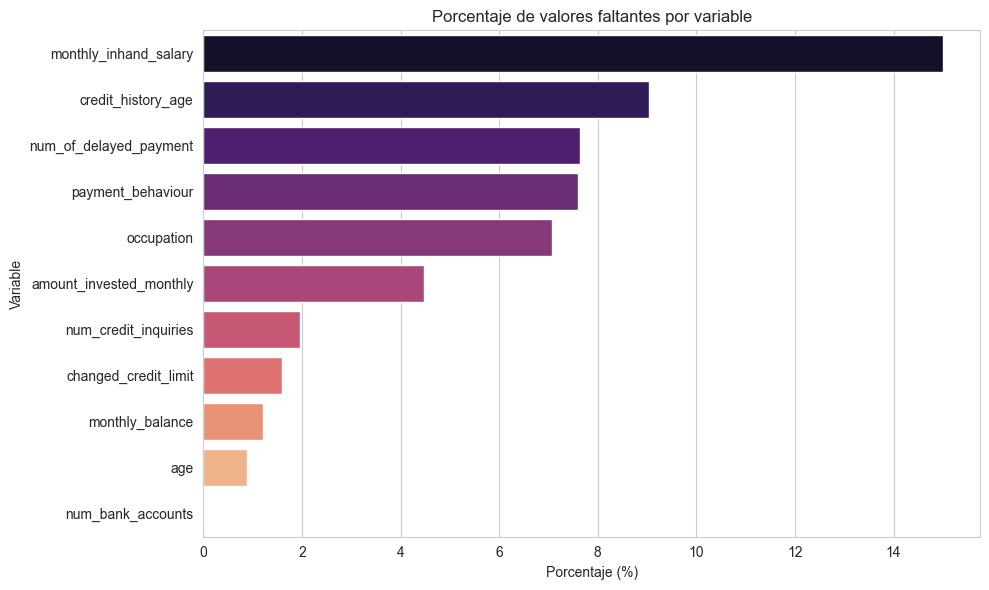

In [407]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Variable': missing.index, 'Porcentaje': missing_percent})
missing_df = missing_df[missing_df['Porcentaje'] > 0].sort_values(by='Porcentaje', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_df, x='Porcentaje', y='Variable', palette='magma')
plt.title("Porcentaje de valores faltantes por variable")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

#### 1.2.2 Imputación de datos faltantes

In [408]:
df_imputed = df.copy()

In [409]:
df_imputed['payment_behaviour'] = hot_deck_group(df_imputed, 'payment_behaviour', 'credit_mix')

In [410]:
df_imputed['occupation'] = hot_deck_group(df_imputed, 'occupation', 'credit_mix')

In [411]:
eval_cat(df,df_imputed,"payment_behaviour")

=== payment_behaviour ===
Chi2 = 0.131, gl = 5, p = 0.9997 →  No se rechaza H0 (distribuciones iguales)
------------------------------------------------------------


In [412]:
eval_cat(df,df_imputed,"occupation")

=== occupation ===
Chi2 = 0.672, gl = 14, p = 1.0000 →  No se rechaza H0 (distribuciones iguales)
------------------------------------------------------------


Ahora, realizemos una imputación de los valores faltantes utilizando un modelo k-NN.

Para poder usar la imputación por medio de un modelo k-NN, debemos hacer un preprocesamiento de los datos, es decir, vamos a estandarizar las variables numéricas, y a codificar las variables categóricas.

In [413]:

#Separar numéricas, categóricas y target
X_num = df_imputed[num_cols]
X_cat = df_imputed[cat_cols]
y = df_imputed['credit_score']

#Escalar numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

Luego, usamos `KNNImputer()` para imputar las variables numéricas.

In [414]:
from sklearn.impute import KNNImputer
# Imputación por KNN
knn_imputer = KNNImputer(n_neighbors=5)
X_num_imputed_scaled = knn_imputer.fit_transform(X_num_scaled)


Y al finalizar la imputación, debemos reconstruir el dataframe para poder seguir con el análisis exploratorio de datos.

In [415]:

#Separamos de nuevo para revertir escalado y codificación
X_num_imputed = scaler.inverse_transform(X_num_imputed_scaled)

df_num_imputed = pd.DataFrame(X_num_imputed, columns=num_cols)
df_final = pd.concat([df_num_imputed, X_cat.reset_index(drop=True)], axis=1)
df_final['credit_score'] = y.values

#### 1.2.3 Evaluación de la imputación

Revisamos que la imputación se haya realizado correctamente:

In [416]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       100000 non-null  float64
 1   annual_income             100000 non-null  float64
 2   monthly_inhand_salary     100000 non-null  float64
 3   num_bank_accounts         100000 non-null  float64
 4   num_credit_card           100000 non-null  float64
 5   interest_rate             100000 non-null  float64
 6   delay_from_due_date       100000 non-null  float64
 7   num_of_delayed_payment    100000 non-null  float64
 8   changed_credit_limit      100000 non-null  float64
 9   num_credit_inquiries      100000 non-null  float64
 10  outstanding_debt          100000 non-null  float64
 11  credit_utilization_ratio  100000 non-null  float64
 12  credit_history_age        100000 non-null  float64
 13  total_emi_per_month       100000 non-null  fl

Gracias a `info()` descubrimos que los valores faltantes fueron imputados. Ahora, evaluemos la imputación por medio de pruebas analíticas.

Dado que usamos `KNNImputer` para la imputación, debemos devolver a su estado original a las variables que no debían ser imputadas, ya que usando este método nos dimos cuenta que ciertos registros de las variables que no necesitaban imputación se modificaban.

In [417]:
imputed_vars=['monthly_inhand_salary', 'credit_history_age','num_of_delayed_payment',
              'amount_invested_monthly', 'num_credit_inquiries','changed_credit_limit',
              'monthly_balance','age', 'num_bank_accounts']


In [418]:
for col in num_cols:
    if col not in imputed_vars:
        df_final[col]=df[col]

Luego de esto, se implementa la función `eval_num` que incluye pruebas de normalidad y de igualdad de distribuciones como prueba la tstudent o prueba la Mann-Whitney U:

In [419]:
from scipy.stats import shapiro, ks_2samp
def eval_num(df,df_imputado, col, alpha=0.05):

    #Pruebas de normalidad
    x = df[col].dropna()
    y = df_imputado[col]
    
    print(f"\nAnálisis estadístico para {col}:")
    print(f"Instancias sin NA en el dataset original: {len(x)}, Instancias sin NA en el dataset imputado: {len(y)}")
    
    sh_x = shapiro(x)
    sh_y = shapiro(y)
    normal_x = sh_x.pvalue > alpha
    normal_y = sh_y.pvalue > alpha

    print(f"Shapiro original: W={sh_x.statistic:.3f}, p={sh_x.pvalue:.4f} -> {'Normal' if normal_x else 'No normal'}")
    print(f"Shapiro imputado: W={sh_y.statistic:.3f}, p={sh_y.pvalue:.4f} -> {'Normal' if normal_y else 'No normal'}")

    if normal_x and normal_y:
        from scipy.stats import ttest_ind
        tt = ttest_ind(x, y, equal_var=False)
        print(f"T de Student (Welch): t={tt.statistic:.3f}, p={tt.pvalue:.4f} -> "
              f"{'Sin diferencia' if tt.pvalue>alpha else 'Diferencia significativa'}")
    else:
        from scipy.stats import mannwhitneyu
        mu = mannwhitneyu(x, y, alternative="two-sided")
        print(f"Mann–Whitney U: U={mu.statistic:.3f}, p={mu.pvalue:.4f} -> "
              f"{'Sin diferencia' if mu.pvalue>alpha else 'Diferencia significativa'}")




Y evaluamos las imputaciones realizadas:

In [420]:
for col in num_cols:
    eval_num(df,df_final, col)


Análisis estadístico para age:
Instancias sin NA en el dataset original: 99114, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.108, p=0.0000 -> No normal
Shapiro imputado: W=0.109, p=0.0000 -> No normal
Mann–Whitney U: U=4957151871.500, p=0.9098 -> Sin diferencia

Análisis estadístico para annual_income:
Instancias sin NA en el dataset original: 100000, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.074, p=0.0000 -> No normal
Shapiro imputado: W=0.074, p=0.0000 -> No normal
Mann–Whitney U: U=5000000000.000, p=1.0000 -> Sin diferencia

Análisis estadístico para monthly_inhand_salary:
Instancias sin NA en el dataset original: 84998, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.883, p=0.0000 -> No normal
Shapiro imputado: W=0.880, p=0.0000 -> No normal
Mann–Whitney U: U=4254263400.000, p=0.7031 -> Sin diferencia

Análisis estadístico para num_bank_accounts:
Instancias sin NA en el dataset original: 99979, Instancia

Como podemos ver en la salida, no existe diferencia significativa entre las variables a imputadas antes y después de su imputación, salvo por las variables `num_credit_inquiries` y `amount_invested_monthly`, por lo que hay que buscar otro método de imputación para estas.

Dado que ambas tienen un bajo porcentaje de valores faltantes, realicemos una imputación por la mediana.

In [421]:
df_final["num_credit_inquiries"]= df["num_credit_inquiries"].fillna(df["num_credit_inquiries"].median())

In [422]:
df_final["amount_invested_monthly"]= df["amount_invested_monthly"].fillna(df["amount_invested_monthly"].median())

In [423]:
eval_num(df, df_final, "num_credit_inquiries")


Análisis estadístico para num_credit_inquiries:
Instancias sin NA en el dataset original: 98035, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.102, p=0.0000 -> No normal
Shapiro imputado: W=0.101, p=0.0000 -> No normal
Mann–Whitney U: U=4894911800.000, p=0.5897 -> Sin diferencia


In [424]:
eval_num(df, df_final, "amount_invested_monthly")


Análisis estadístico para amount_invested_monthly:
Instancias sin NA en el dataset original: 95521, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.742, p=0.0000 -> No normal
Shapiro imputado: W=0.733, p=0.0000 -> No normal
Mann–Whitney U: U=4776050000.000, p=1.0000 -> Sin diferencia


Como el p-valor en ambos casos es mayor a mi nivel de significancia, no existe diferencia significativa en las variables antes y despúes de la imputación, por lo que podemos continuar con el EDA.

Veamos de nuevo un resumen numérico luego de imputar:

In [425]:
print("\nResumen de las variables numéricas:")
display(df_final[num_cols].describe().T)


Resumen de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
age,100000.0,116.069316,6.843945e+02,14.000000,25.000000,33.000000,42.000000,8.698000e+03
annual_income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
monthly_inhand_salary,100000.0,4151.661894,3.121184e+03,303.645417,1661.722917,3068.619167,5881.567354,1.520463e+04
num_bank_accounts,100000.0,17.092280,1.174047e+02,0.000000,3.000000,6.000000,7.000000,1.798000e+03
num_credit_card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
interest_rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
num_of_delayed_payment,100000.0,31.019776,2.196367e+02,0.000000,9.000000,14.000000,18.000000,4.397000e+03
changed_credit_limit,100000.0,10.345331,6.708848e+00,0.000000,5.270000,9.330000,14.700000,3.697000e+01
num_credit_inquiries,100000.0,27.326780,1.912938e+02,0.000000,3.000000,6.000000,9.000000,2.597000e+03


Luego de la imputación de valores faltantes, vayamos ahora a un análisis gráfico de las variables.

### 1.3. Visualización de la variable objetivo(`target`)
Ahora nos vamos a enfocar en cada columna por separado. Empezamos por la columna más importante: `credit_score`, que nos dice si la puntuación crediticia de una persona es buena (`good`), normal (`standard`), o pobre (`poor`).

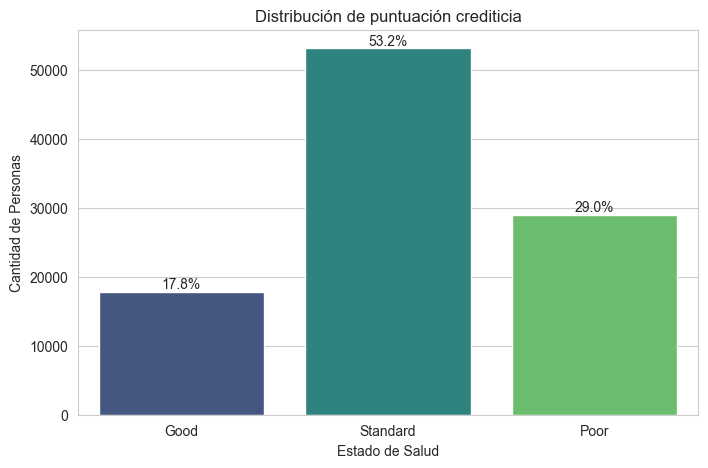

credit_score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


In [426]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='credit_score', data=df_final, palette='viridis')
plt.title('Distribución de puntuación crediticia')
plt.xlabel('Estado de Salud')
plt.ylabel('Cantidad de Personas')

total = len(df_final['credit_score'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

print(df_final['credit_score'].value_counts())

En este paso, visualizamos la distribución de la variable objetivo, `target`, que categoriza a los individuos como "healthy" (sanos) o "diseased" (enfermos).

-   **Desequilibrio del conjunto de datos:** En el gráfico de barras se ve que nuestro conjunto de datos está desequilibrado.
-   **Proporción de clases:** Encontramos que el 70.1% de los individuos (`70,097`) pertenecen a la clase "healthy" y el 29.9% (`29,903`) pertenecen a la clase "diseased".

### 1.4  Análisis univariado de las variables numéricas

Para las variables numéricas (como edad, colesterol, etc.), vamos a usar dos tipos de gráficos:
- **Histogramas:** para ver la "forma" de los datos y dónde se concentran más.
- **Diagramas de caja :** para ver qué tan dispersos están los datos y si hay valores "atípicos" o muy extremos.

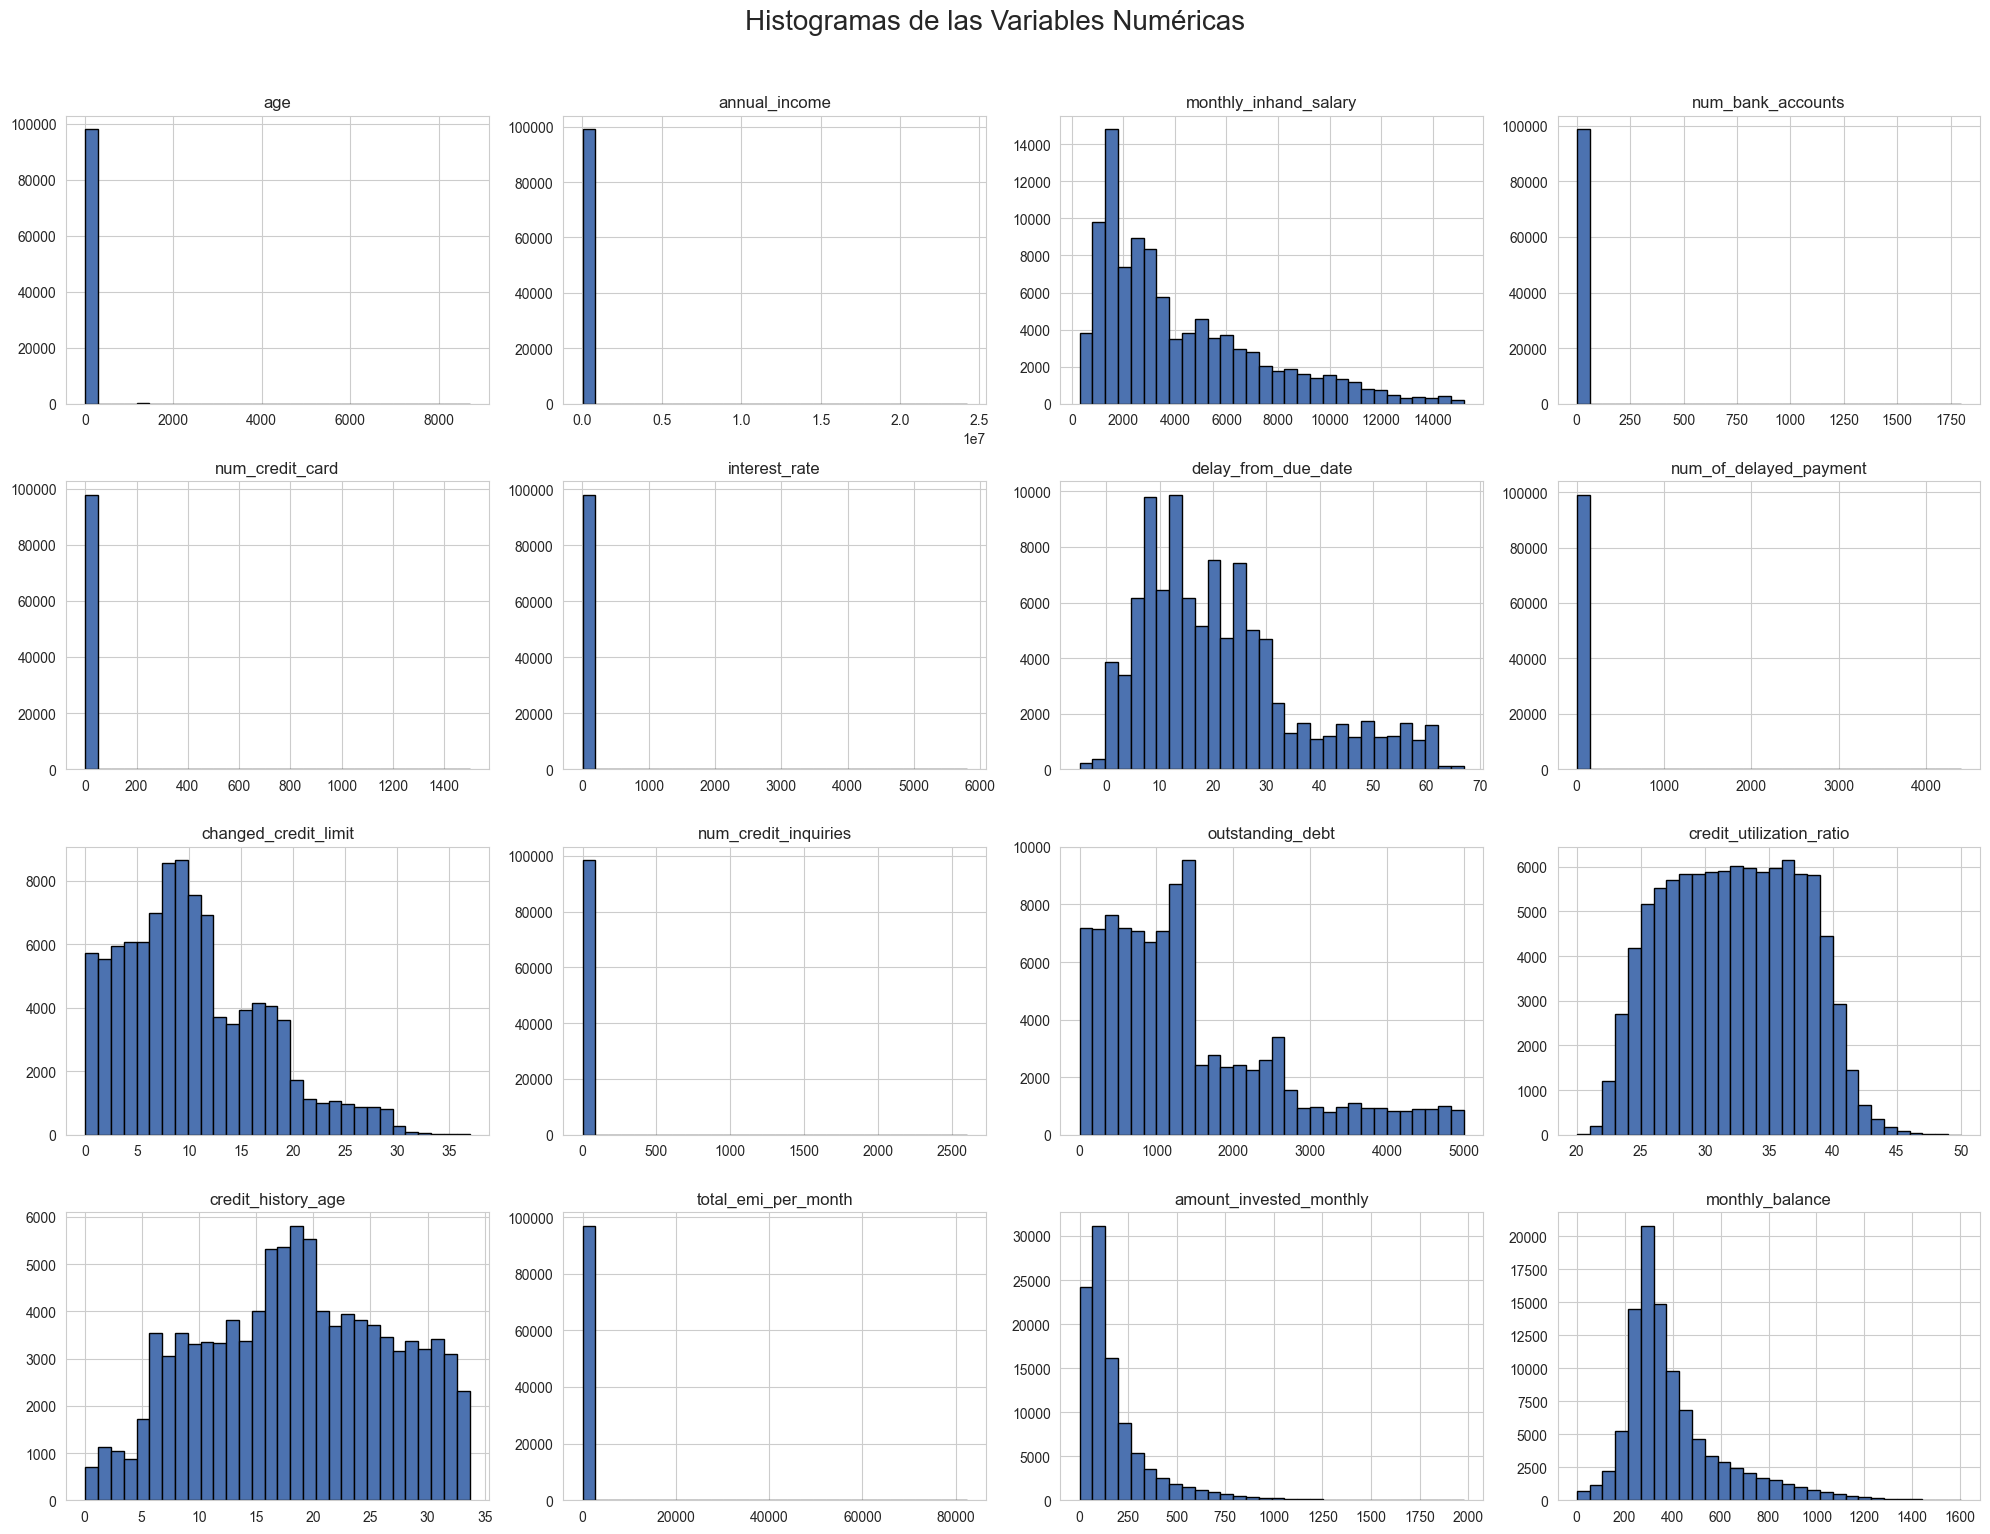

In [427]:
df_final[num_cols].hist(bins=30, figsize=(20, 15), layout=(-1, 4), edgecolor='black')
plt.suptitle('Histogramas de las Variables Numéricas', size=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


El análisis de histogramas proporciona una vista general del comportamiento estadístico de las variables numéricas, permitiéndonos detectar patrones, sesgos y posibles anomalías en los datos. A partir del gráfico anterior, extraemos los siguientes hallazgos:

- **Distribuciones Aproximadamente Normales.** Varias variables muestran distribuciones simétricas en forma de campana, lo que sugiere una buena calidad de datos y estabilidad estadística: **`waist_size`**, **`blood_pressure`**, **`cholesterol`**, **`heart_rate`**,**`glucose`**, **`sleep_hours`**, **`calorie_intake`**: Estas variables tienen una forma cercana a la distribución normal, con concentraciones de datos alrededor de la media. Son candidatas ideales para técnicas estadísticas clásicas que asumen normalidad.



- **Distribuciones Asimétricas (Sesgadas a la Derecha).** Estas variables presentan una concentración de observaciones en valores bajos y una cola larga hacia la derecha. En tales casos, la mediana puede ser una mejor medida de tendencia central: **`income`**, **`physical_activity`**, **`daily_steps`**, **`screen_time`**, **`sugar_intake`**, **`water_intake`**, **`weight`**, **`bmi`**,**`bmi_scaled`**, **`bmi_corrected`**: Este comportamiento es común en métricas que tienen un límite inferior natural (cero) y pocos casos con valores muy altos. Su transformación (como logaritmos) podría ayudar en ciertos modelos.

- **Distribuciones Uniformes o Artificiales.** Algunas variables muestran comportamientos particulares que pueden tener causas técnicas o de recolección de datos:
    - **`age`**: Muestra una distribución relativamente uniforme, lo que indica buena representación de todas las edades. Esto es útil para evitar sesgos etarios en el modelo.
    - **`stress_level`**, **`mental_health_score`**, **`meals_per_day`**: Tienen distribuciones discretas o uniformemente distribuidas, probablemente debido a su escala categórica o limitada por diseño.
    - **`work_hours`**: Está fuertemente concentrada en 8 horas, lo que refleja un patrón laboral estándar.






Por otro lado tenemos los boxplots:

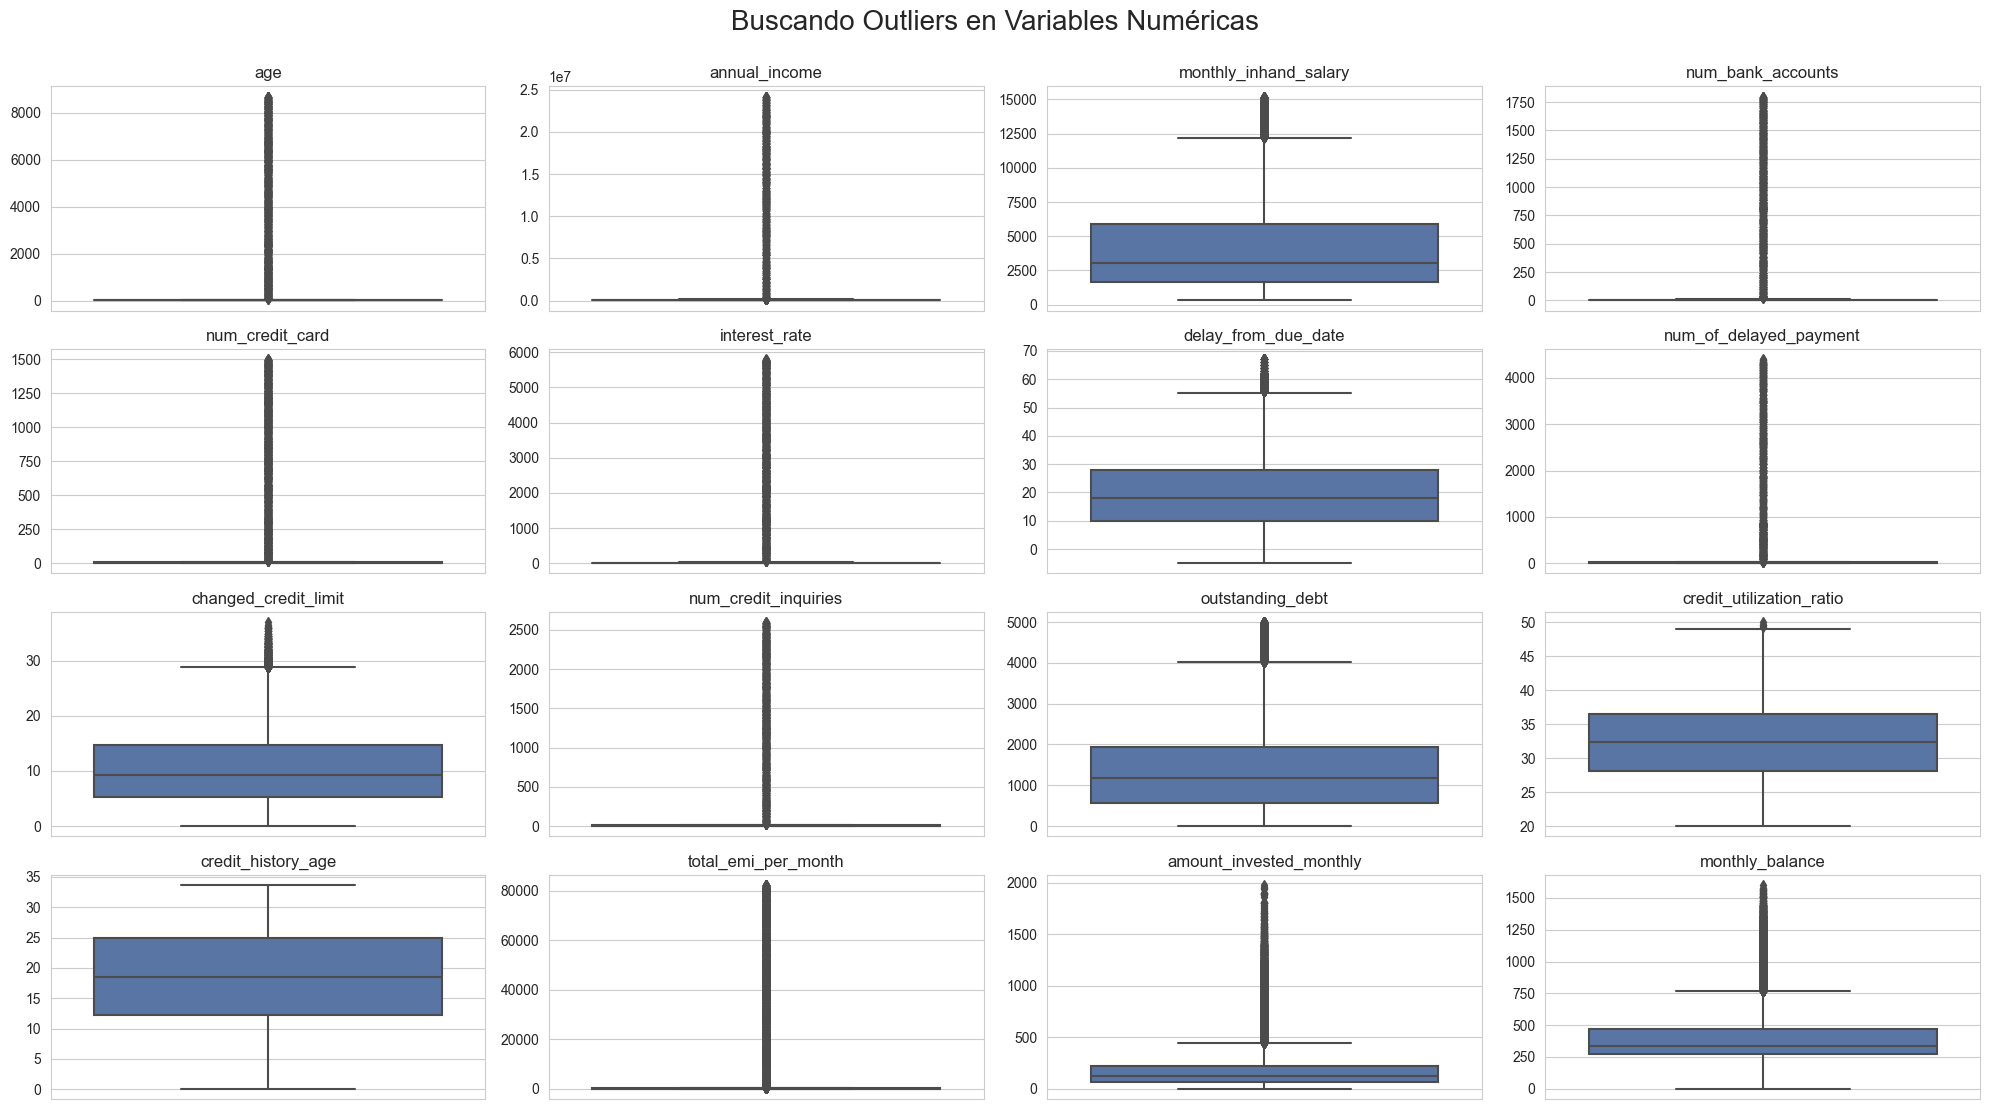

In [428]:
plt.figure(figsize=(20, 12))
plt.suptitle('Buscando Outliers en Variables Numéricas', size=20, y=0.95)


for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_final[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Veamos ahora un análisis de las variables numéricas que consideramos **clave** para el análisis.

**Presencia Generalizada de Outliers:**  
  Se observa una alta presencia de outliers en múltiples variables biométricas, incluyendo `blood_pressure`, `cholesterol`, `heart_rate`, `glucose` y `calorie_intake`. Estos outliers aparecen en ambos extremos, aunque predominan los valores altos. Esta dispersión podría estar asociada a casos clínicos extremos que requieren atención especial en el modelado.

- **Outliers en Variables con Distribución Asimétrica:**  
  Las variables `bmi` e `insulin` presentan una concentración significativa de outliers en el extremo superior. Esto concuerda con la distribución asimétrica positiva observada en los histogramas. Estos valores extremos podrían tener una alta correlación con la condición "diseased", por lo que podrían ser relevantes para el rendimiento de los modelos predictivos.

- **Variables con Distribución Controlada:**  
  Variables como `age` y `stress_level` muestran boxplots más compactos, sin presencia notable de outliers. Esto sugiere que sus datos están distribuidos de manera más uniforme y dentro de rangos biológicamente esperados, por lo que no se requiere tratamiento especial para valores extremos.

- **Consideraciones para el Preprocesamiento:**  
  Dado que nuestro objetivo es implementar modelos de machine learning capaces de poder predecir si una persona estará enferma o no, consideramos no tratar los outliers (a parte de los que ya fueron tratados que eran valores imposibles como valores negativos en la variable `insulin` por ejemplo) debido a que son estos datos "anormales" los que pueden determinar si un individuo cuenta con una enfermedad.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# Función para detectar outliers usando IQR
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((serie < lower) | (serie > upper))

# Contar outliers por variable
print("Conteo de outliers por variable numérica:")
for col in num_cols:
    outliers = detectar_outliers_iqr(df_final[col])
    print(f"{col}: {outliers.sum()} outliers detectados")

# Crear copia del dataset y aplicar winsorización (1% y 99%) a las variables numéricas
df_winsor = df_final.copy()
for col in num_cols:
    skew = df_final[col].skew()
    if abs(skew) > 2:
        limits = [0.02, 0.02]  # más agresivo si hay fuerte asimetría
    elif abs(skew) > 1:
        limits = [0.01, 0.01]
    else:
        limits = [0.005, 0.005]
    df_winsor[col] = winsorize(df_final[col], limits=limits)




Conteo de outliers por variable numérica:
age: 1966 outliers detectados
annual_income: 2783 outliers detectados
monthly_inhand_salary: 2115 outliers detectados
num_bank_accounts: 1315 outliers detectados
num_credit_card: 2271 outliers detectados
interest_rate: 2034 outliers detectados
delay_from_due_date: 4002 outliers detectados
num_of_delayed_payment: 1014 outliers detectados
changed_credit_limit: 957 outliers detectados
num_credit_inquiries: 1650 outliers detectados
outstanding_debt: 5272 outliers detectados
credit_utilization_ratio: 4 outliers detectados
credit_history_age: 0 outliers detectados
total_emi_per_month: 6795 outliers detectados
amount_invested_monthly: 8703 outliers detectados
monthly_balance: 7671 outliers detectados


In [430]:
# Verificación rápida: resumen estadístico de variables tratadas
print("\nResumen estadístico tras winsorización:")
df_winsor[num_cols].describe().T


Resumen estadístico tras winsorización:


,count,mean,std,min,25%,50%,75%,max
age,100000.0,33.777140,11.067517,15.000000,25.000000,33.000000,42.000000,56.000000
annual_income,100000.0,51606.195455,39612.875620,8137.625000,19457.500000,37578.610000,72790.920000,166837.640000
monthly_inhand_salary,100000.0,4145.066437,3096.530388,550.367917,1661.722917,3068.619167,5881.567354,13611.203333
num_bank_accounts,100000.0,5.429450,2.628537,0.000000,3.000000,6.000000,7.000000,10.000000
num_credit_card,100000.0,9.085470,23.802058,1.000000,4.000000,5.000000,7.000000,171.000000
interest_rate,100000.0,16.827500,18.145260,1.000000,8.000000,13.000000,20.000000,128.000000
delay_from_due_date,100000.0,21.069970,14.831528,-1.000000,10.000000,18.000000,28.000000,62.000000
num_of_delayed_payment,100000.0,13.505270,6.130876,1.000000,9.000000,14.000000,18.000000,25.000000
changed_credit_limit,100000.0,10.337939,6.685822,0.000000,5.270000,9.330000,14.700000,29.540000
num_credit_inquiries,100000.0,5.951190,4.000056,0.000000,3.000000,6.000000,9.000000,16.000000


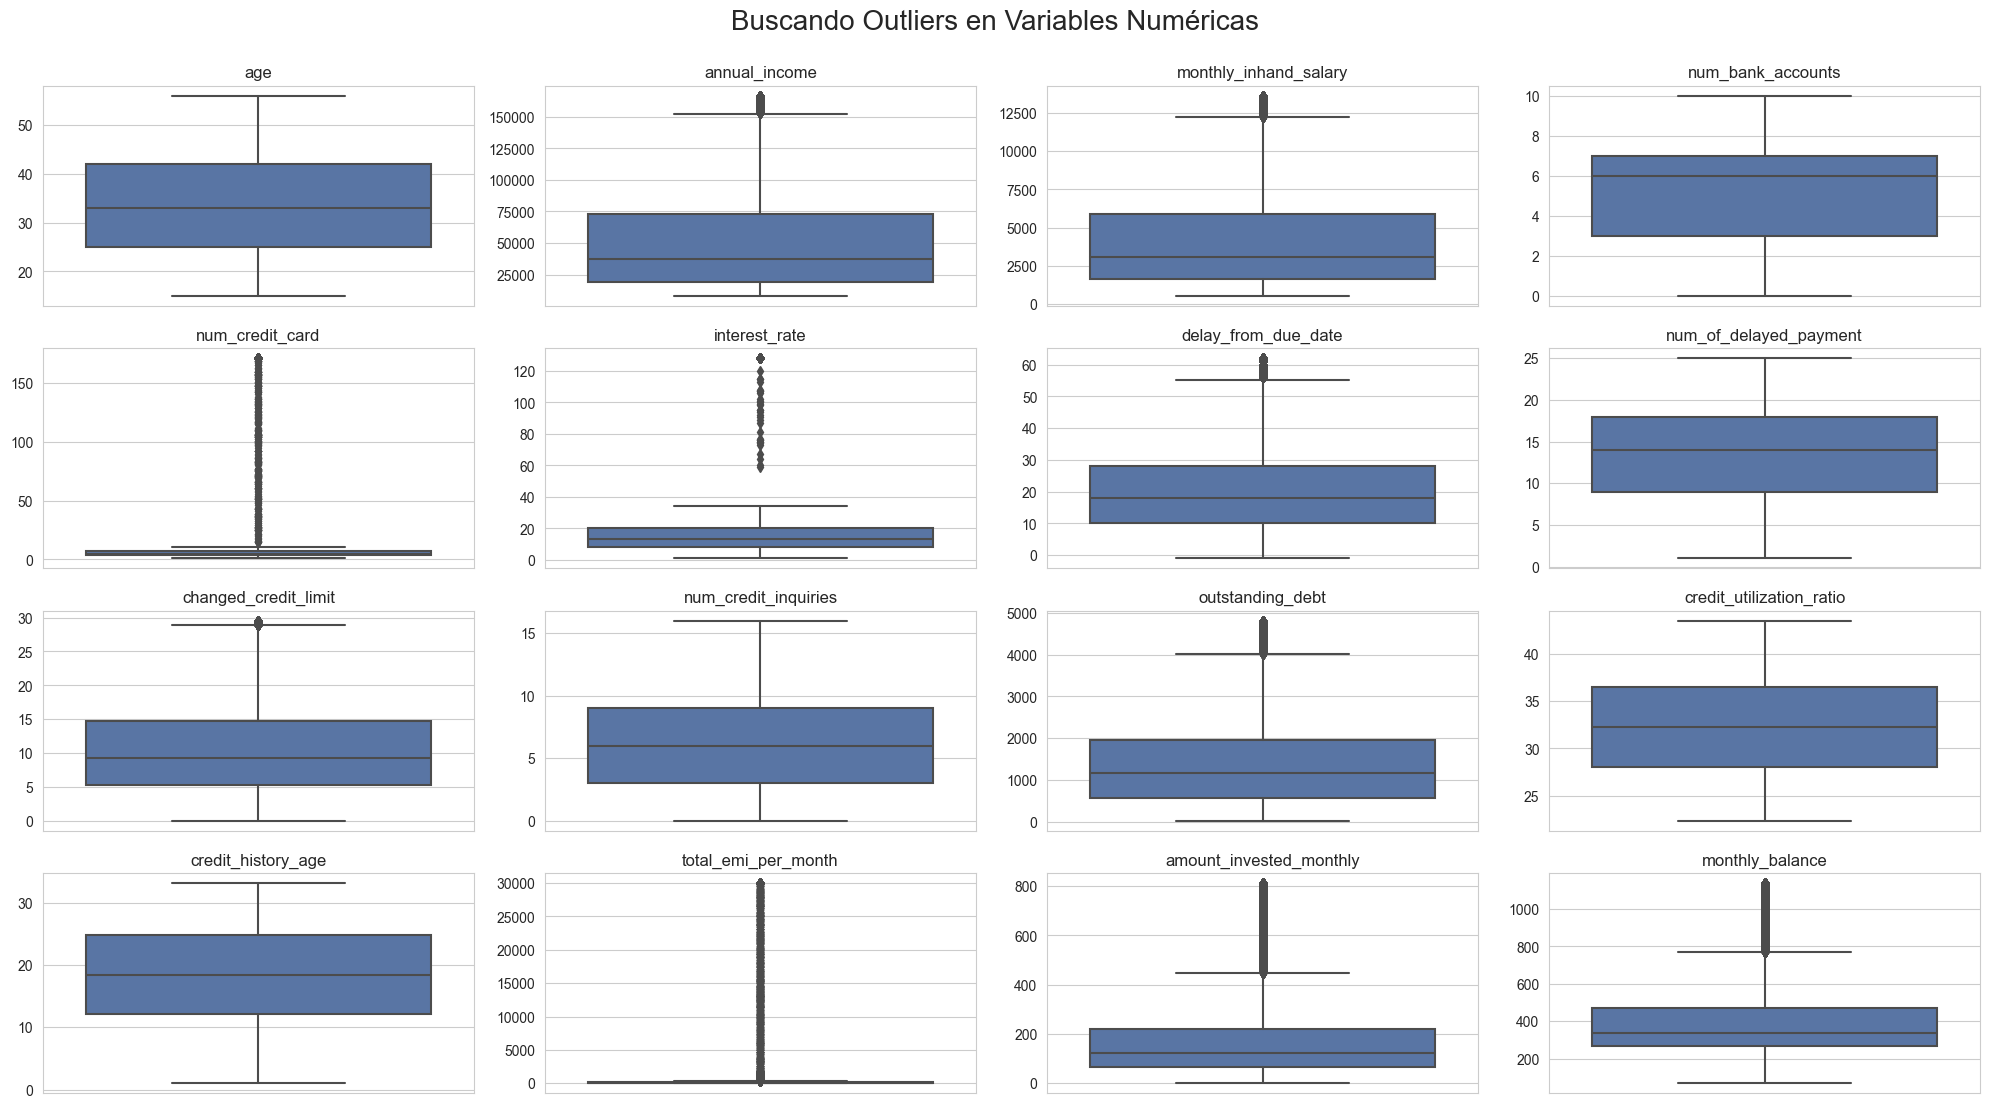

In [431]:
plt.figure(figsize=(20, 12))
plt.suptitle('Buscando Outliers en Variables Numéricas', size=20, y=0.95)


for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_winsor[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [432]:
for col in num_cols:
    eval_num(df_final, df_winsor, col)


Análisis estadístico para age:
Instancias sin NA en el dataset original: 100000, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.109, p=0.0000 -> No normal
Shapiro imputado: W=0.970, p=0.0000 -> No normal
Mann–Whitney U: U=5000673386.500, p=0.9584 -> Sin diferencia

Análisis estadístico para annual_income:
Instancias sin NA en el dataset original: 100000, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.074, p=0.0000 -> No normal
Shapiro imputado: W=0.873, p=0.0000 -> No normal
Mann–Whitney U: U=5000002000.500, p=0.9999 -> Sin diferencia

Análisis estadístico para monthly_inhand_salary:
Instancias sin NA en el dataset original: 100000, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.880, p=0.0000 -> No normal
Shapiro imputado: W=0.880, p=0.0000 -> No normal
Mann–Whitney U: U=5000000000.000, p=1.0000 -> Sin diferencia

Análisis estadístico para num_bank_accounts:
Instancias sin NA en el dataset original: 100000, Instan

In [433]:
def reemplazar_outliers_por_nan(df, columnas):
    df_sin_outliers = df.copy()
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper = Q3 + 3 * IQR
        # Reemplaza solo los valores por encima del límite superior
        df_sin_outliers[col] = df[col].where(df[col] <= upper, np.nan)
        
    return df_sin_outliers

df_total=reemplazar_outliers_por_nan(df_winsor, ['num_credit_card', 'interest_rate', 'total_emi_per_month'])

In [434]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       100000 non-null  float64
 1   annual_income             100000 non-null  float64
 2   monthly_inhand_salary     100000 non-null  float64
 3   num_bank_accounts         100000 non-null  float64
 4   num_credit_card           97734 non-null   float64
 5   interest_rate             97966 non-null   float64
 6   delay_from_due_date       100000 non-null  int64  
 7   num_of_delayed_payment    100000 non-null  float64
 8   changed_credit_limit      100000 non-null  float64
 9   num_credit_inquiries      100000 non-null  float64
 10  outstanding_debt          100000 non-null  float64
 11  credit_utilization_ratio  100000 non-null  float64
 12  credit_history_age        100000 non-null  float64
 13  total_emi_per_month       95730 non-null   fl

In [435]:

#Separar numéricas, categóricas y target
X_num = df_total[num_cols]
X_cat = df_total[cat_cols]
y = df_total['credit_score']

#Escalar numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

from sklearn.impute import KNNImputer
# Imputación por KNN
knn_imputer = KNNImputer(n_neighbors=5)
X_num_imputed_scaled = knn_imputer.fit_transform(X_num_scaled)

#Separamos de nuevo para revertir escalado y codificación
X_num_imputed = scaler.inverse_transform(X_num_imputed_scaled)

df_num_imputed = pd.DataFrame(X_num_imputed, columns=num_cols)
df_real = pd.concat([df_num_imputed, X_cat.reset_index(drop=True)], axis=1)
df_real['credit_score'] = y.values

In [436]:
for col in num_cols:
    if col not in ['num_credit_card', 'interest_rate', 'total_emi_per_month']:
        df_real[col]=df_winsor[col]

In [437]:
for col in ['num_credit_card', 'interest_rate', 'total_emi_per_month']:
    eval_num(df_total, df_real, col)


Análisis estadístico para num_credit_card:
Instancias sin NA en el dataset original: 97734, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.965, p=0.0000 -> No normal
Shapiro imputado: W=0.966, p=0.0000 -> No normal
Mann–Whitney U: U=4885919435.000, p=0.9504 -> Sin diferencia

Análisis estadístico para interest_rate:
Instancias sin NA en el dataset original: 97966, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.953, p=0.0000 -> No normal
Shapiro imputado: W=0.953, p=0.0000 -> No normal
Mann–Whitney U: U=4918742213.000, p=0.1076 -> Sin diferencia

Análisis estadístico para total_emi_per_month:
Instancias sin NA en el dataset original: 95730, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.848, p=0.0000 -> No normal
Shapiro imputado: W=0.852, p=0.0000 -> No normal
Mann–Whitney U: U=4754281314.500, p=0.0099 -> Diferencia significativa


In [438]:
df_real["total_emi_per_month"]=df_total["total_emi_per_month"].fillna(df_total["total_emi_per_month"].median())

In [439]:
eval_num(df_total, df_real, "total_emi_per_month")


Análisis estadístico para total_emi_per_month:
Instancias sin NA en el dataset original: 95730, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.848, p=0.0000 -> No normal
Shapiro imputado: W=0.842, p=0.0000 -> No normal
Mann–Whitney U: U=4786491460.000, p=0.9995 -> Sin diferencia


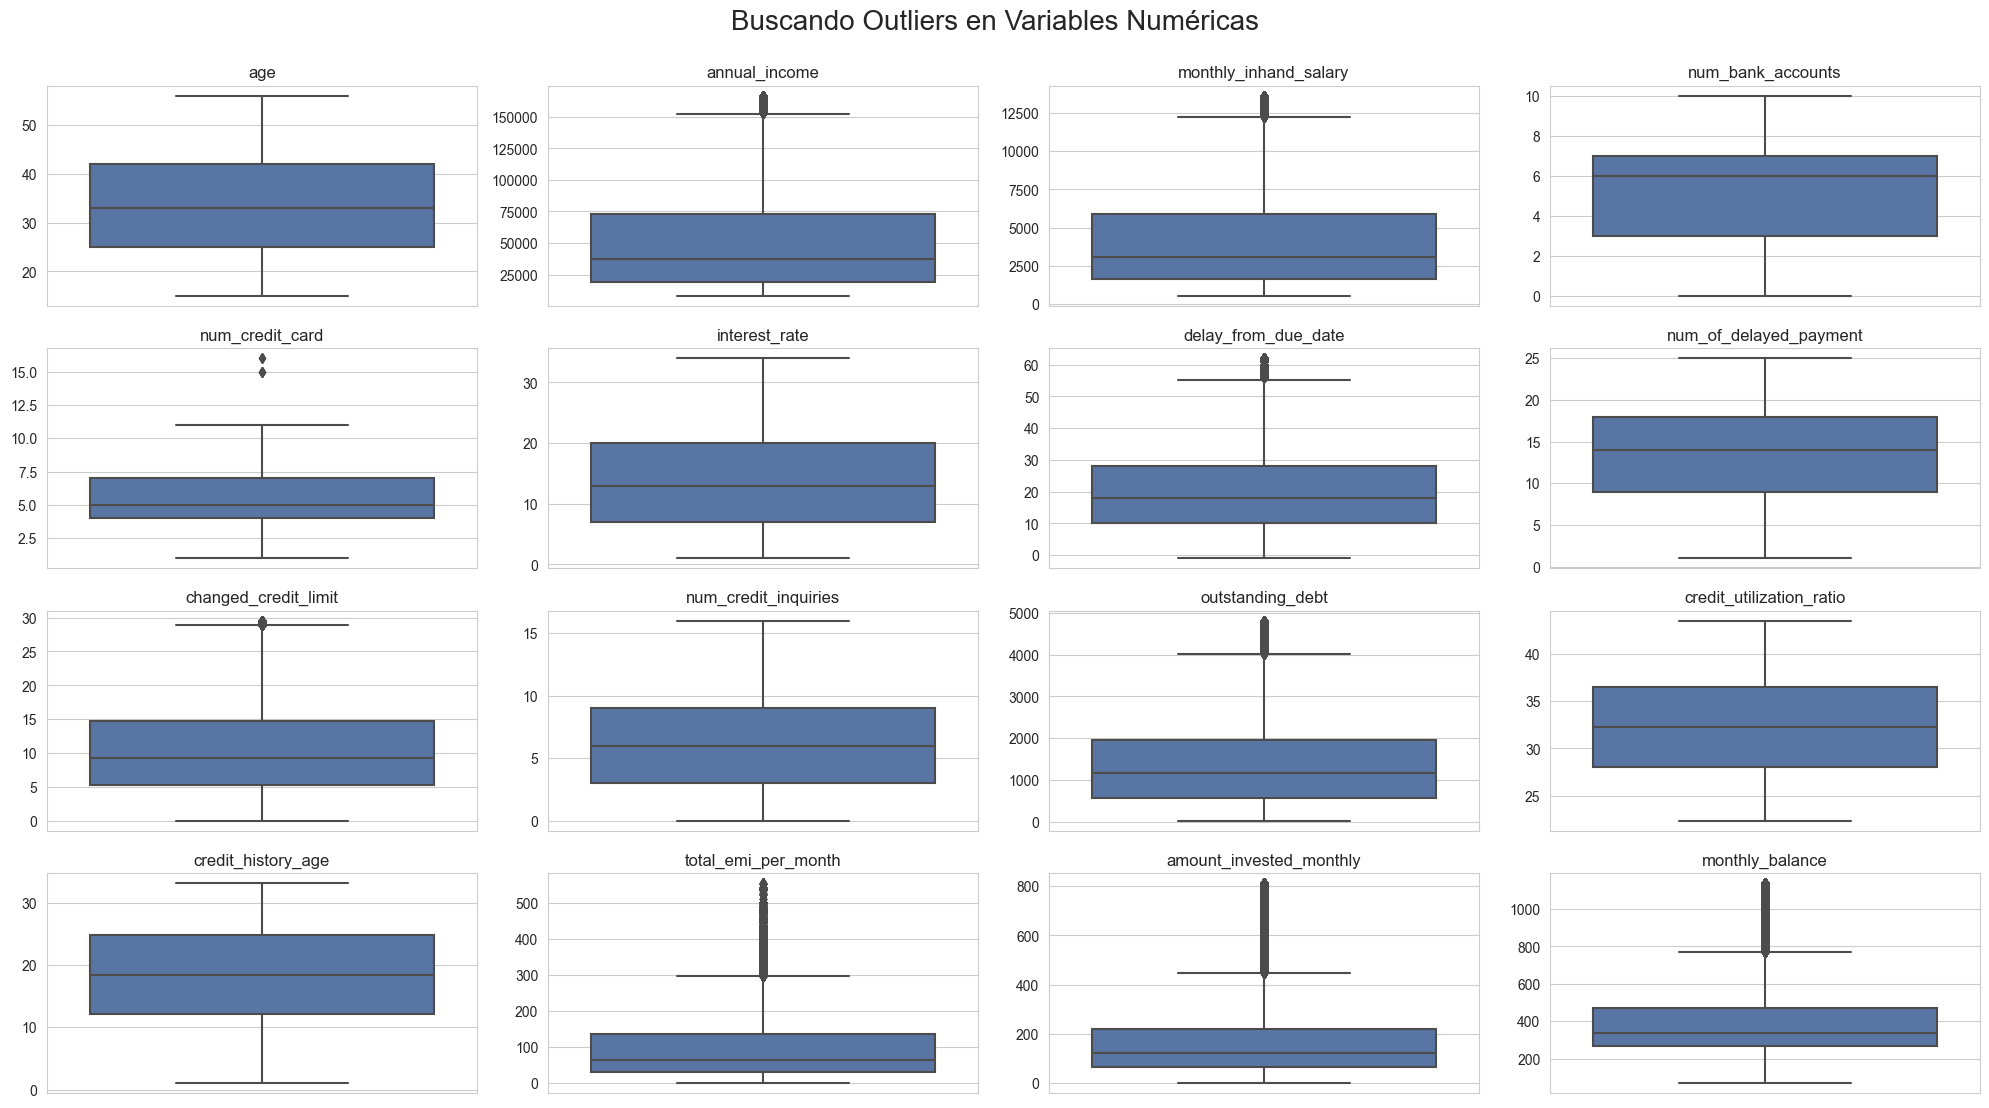

In [440]:
plt.figure(figsize=(20, 12))
plt.suptitle('Buscando Outliers en Variables Numéricas', size=20, y=0.95)


for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_real[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 1.5. Variables Numéricas vs. Target
Ahora vamos a empezar a cruzarlas de dos en dos. Nos interesa saber **cómo se relaciona cada característica con la variable `target`**.
Ahora vamos a ver si los valores numéricos (como la presión arterial o el IMC) son distintos para la gente sana y la gente enferma.

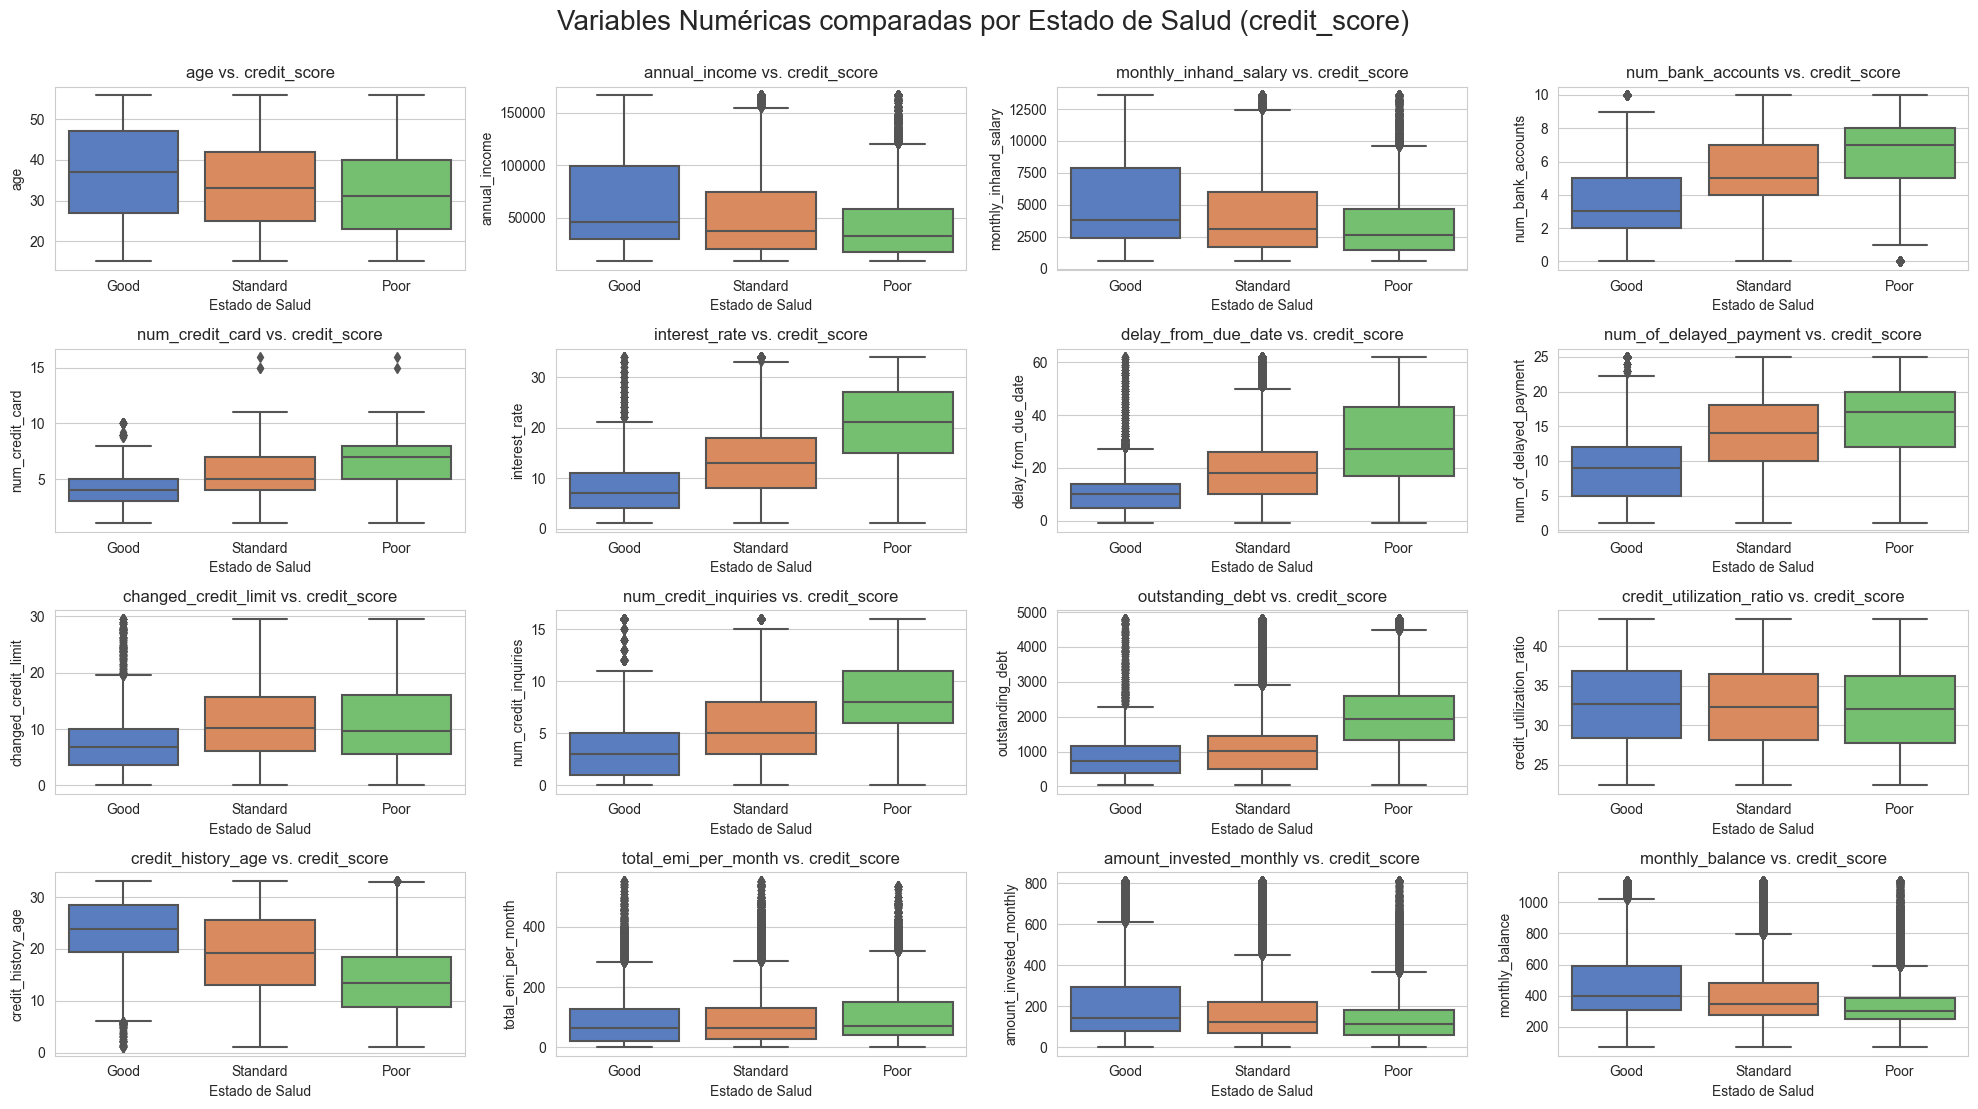

In [441]:

plt.figure(figsize=(20, 12))
plt.suptitle('Variables Numéricas comparadas por Estado de Salud (credit_score)', size=20, y=0.95)

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='credit_score', y=col, data=df_real, palette='muted')
    plt.title(f'{col} vs. credit_score')
    plt.xlabel('Estado de Salud')
    plt.ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


El análisis de estos boxplots segmentados por la variable objetivo (`healthy` vs. `diseased`) nos permite identificar qué variables podrían tener un mayor poder explicativo o predictivo frente al estado de salud. A continuación se destacan los hallazgos más relevantes:

En general podemos ver que en cada variable no parece existir mucha diferencia en el target, lo cual puede ser perjudicial para las predicciones, sin embargo hay algunas diferencias en los valores atípicos de ciertas variables:

**Variables con Discriminación entre Grupos:**

Las siguientes variables muestran diferencias en su distribución entre personas sanas y enfermas, lo cual indica su potencial como predictores del estado de salud:

- **`age`**: Las personas con enfermedad tienden a ser mayores, con una mediana desplazada hacia la derecha respecto al grupo sano.
- **`bmi`**: El índice de masa corporal es algo más bajo en el grupo enfermo, lo que sugiere una posible asociación con condiciones metabólicas.
- **`cholesterol`**: Aunque la diferencia no es tan pronunciada, el grupo enfermo presenta una mediana y rango ligeramente más altos.
- **`daily_steps`**: Las personas enfermas suelen ser más propensas a enfermedades si no cuentan con actividad física, en este caso se ve una disminución en los pasos diarios para el grupo enfermo.
- **`income`**: El ingreso de los enfermos es ligeramente menor que el del grupo sano, lo que puede deberse a la dificultad para acceder a medicamentos debido a su alto coste.






### 1.6 Variables categóricas vs. Target

Ahora vamos a ver si alguna categoría (como ser fumador o el tipo de dieta) es más común en el grupo de enfermos que en el de sanos.

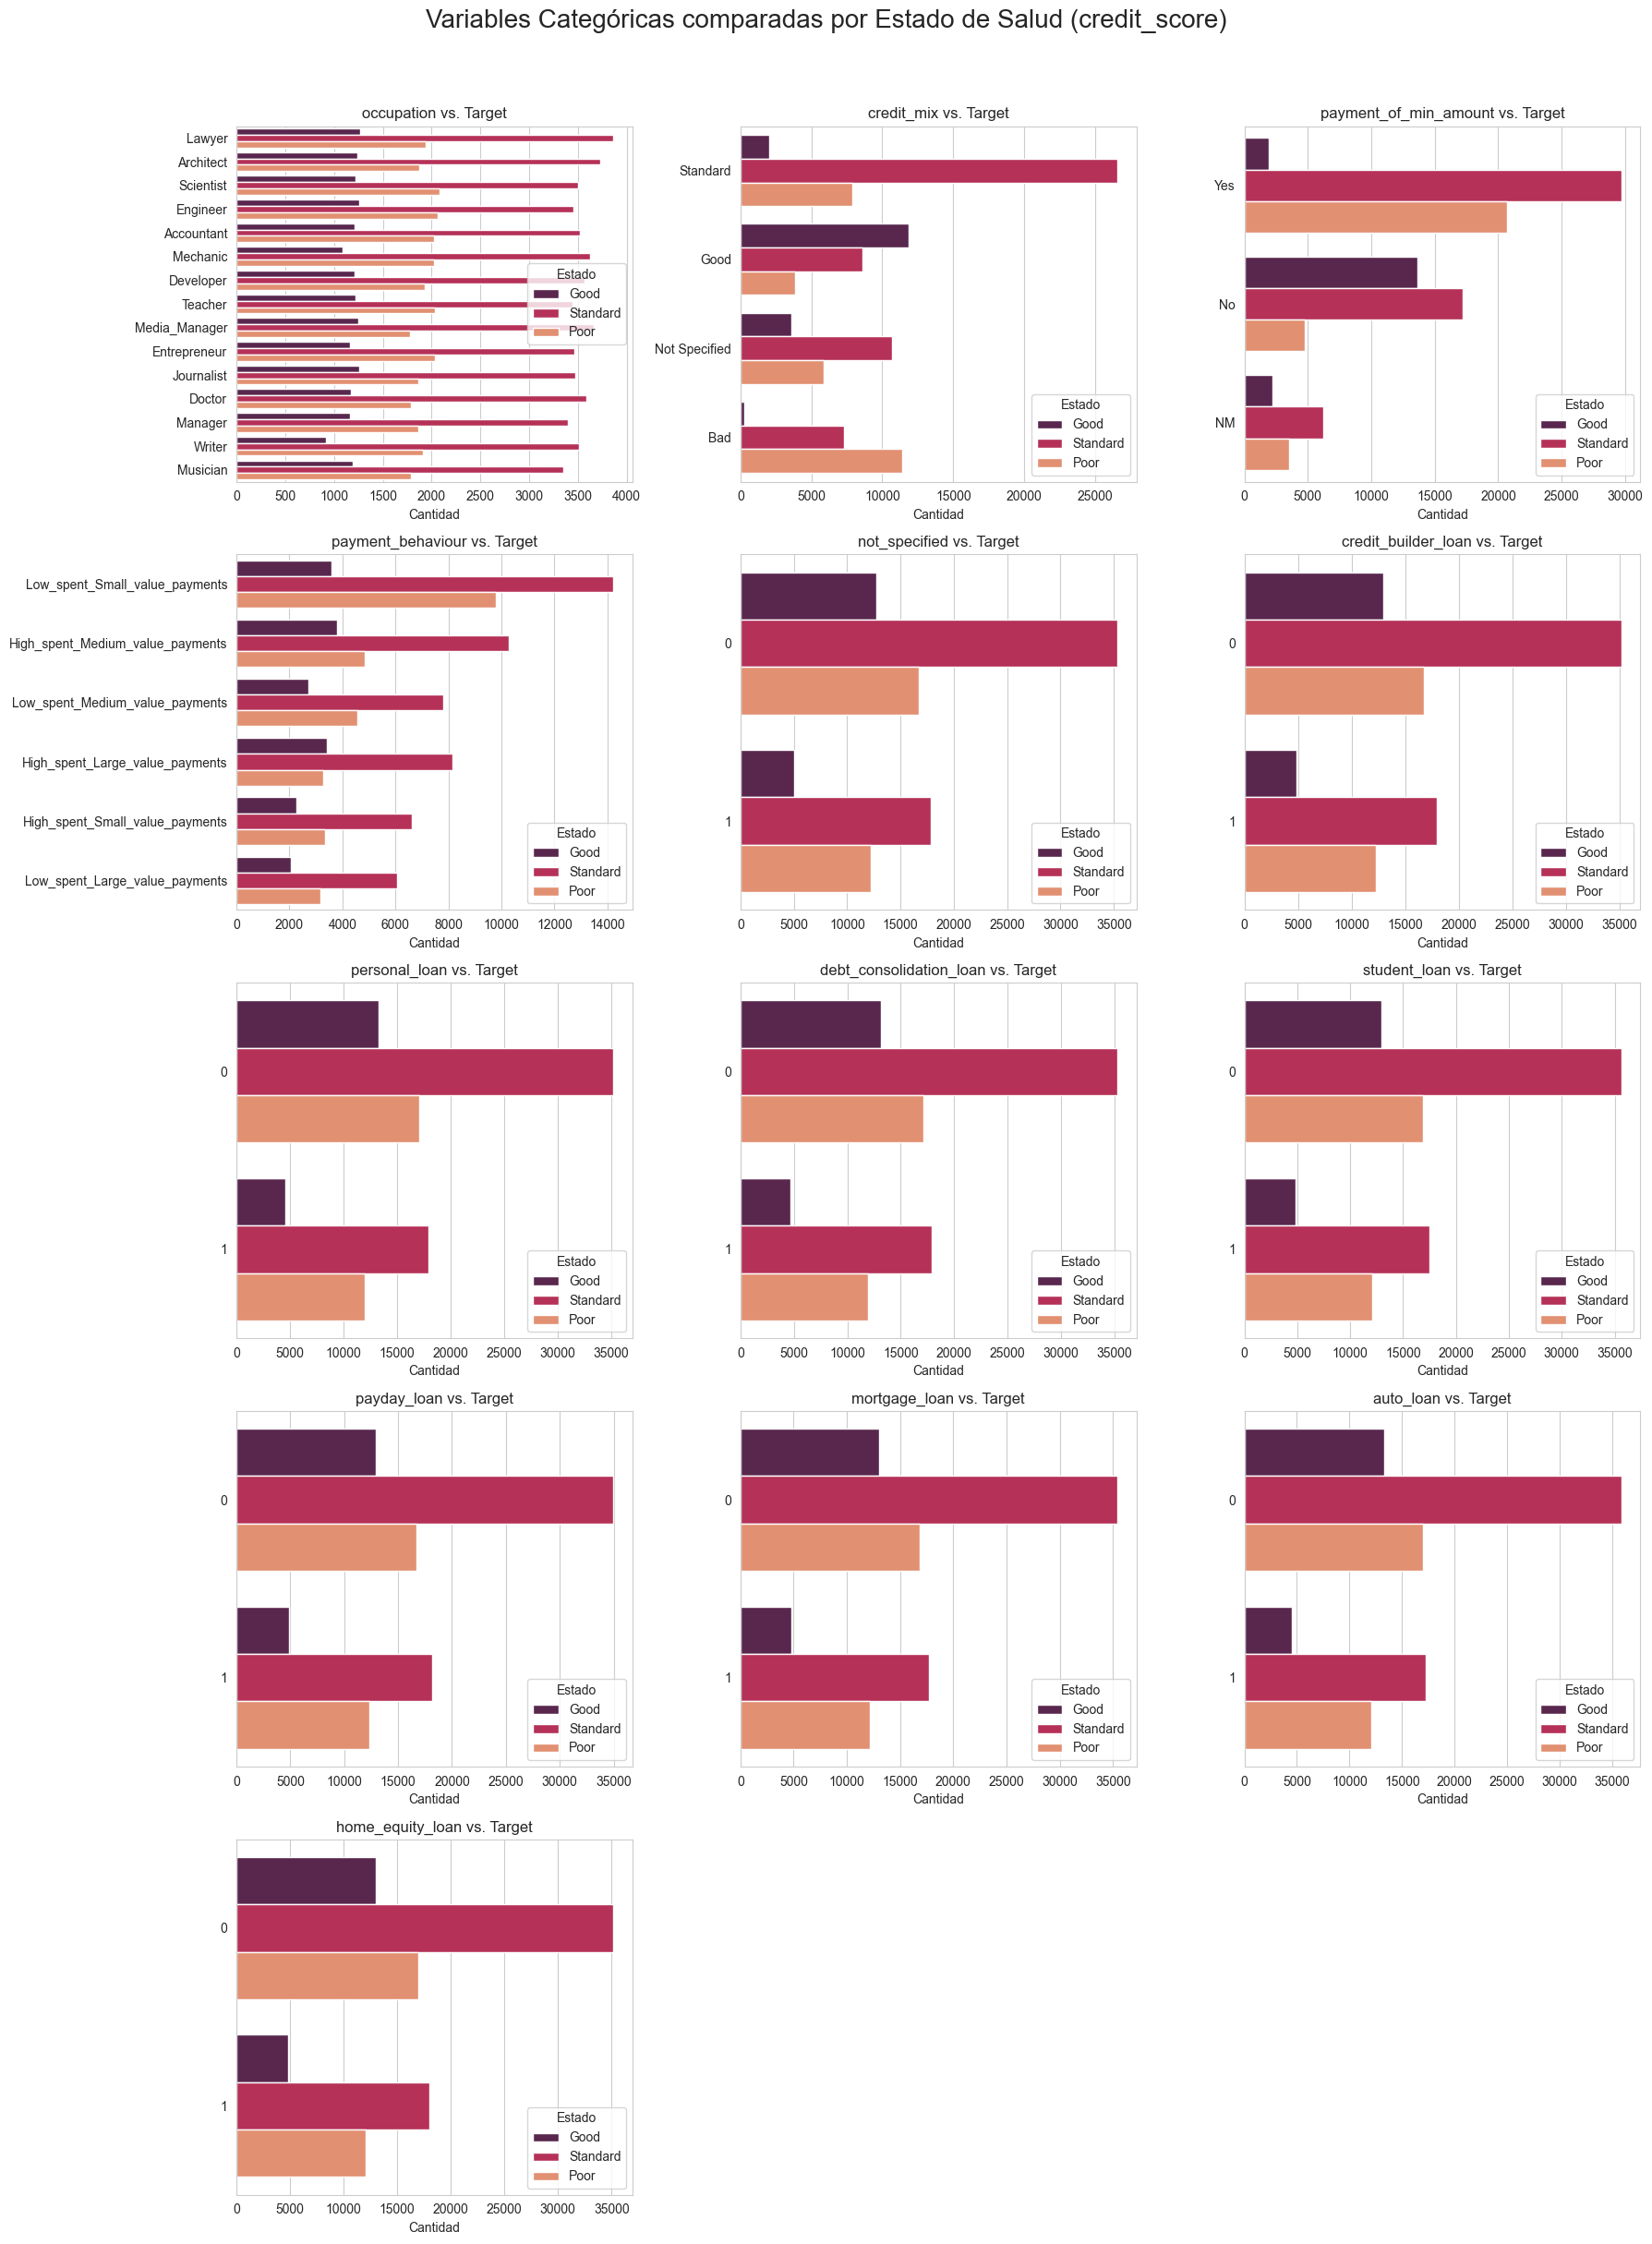

In [442]:

ncols = 3 

n_features = len(cat_cols)
nrows = (n_features + ncols - 1) // ncols

plt.figure(figsize=(18, nrows * 5))
plt.suptitle('Variables Categóricas comparadas por Estado de Salud (credit_score)', size=20, y=1.0)

for i, col in enumerate(cat_cols, 1):

    plt.subplot(nrows, ncols, i)
    sns.countplot(y=col, data=df_real, hue='credit_score', order=df_real[col].value_counts().index, palette='rocket')
    plt.title(f'{col} vs. Target')
    plt.xlabel('Cantidad')
    plt.ylabel('')
    plt.legend(title='Estado')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


De nuevo, vemos patrones similares en las categorías de cada variable (exceptuando a `alcohol_consumption` a la cual se le introdujo una nueva categoría) lo cual puede confundir a los modelos predictivos que vamos a implementar, sin embargo se pueden apreciar ciertas diferencias:

Encontramos que hay cierta relación entre el estado de salud y varias variables de estilo de vida y demografía. Notamos que la proporción de individuos "diseased" es más alta en categorías como:
-   `sleep_quality`: En la categoría "Poor" (pobre).
-   `smoking_habit`: En la categoría "Heavy" (fumador empedernido).
-   `exercise_type`: En la categoría "None" (ninguno).
-   `device_usage`: En la categoría "High" (Usa demasiado los dispositivos electrónicos)
-   `education_level`: En los niveles educativos más bajos (ej. "High School").


### 1.7. Correlación
Realizaremos esto para ver si existe multicolinealidad entre variables.

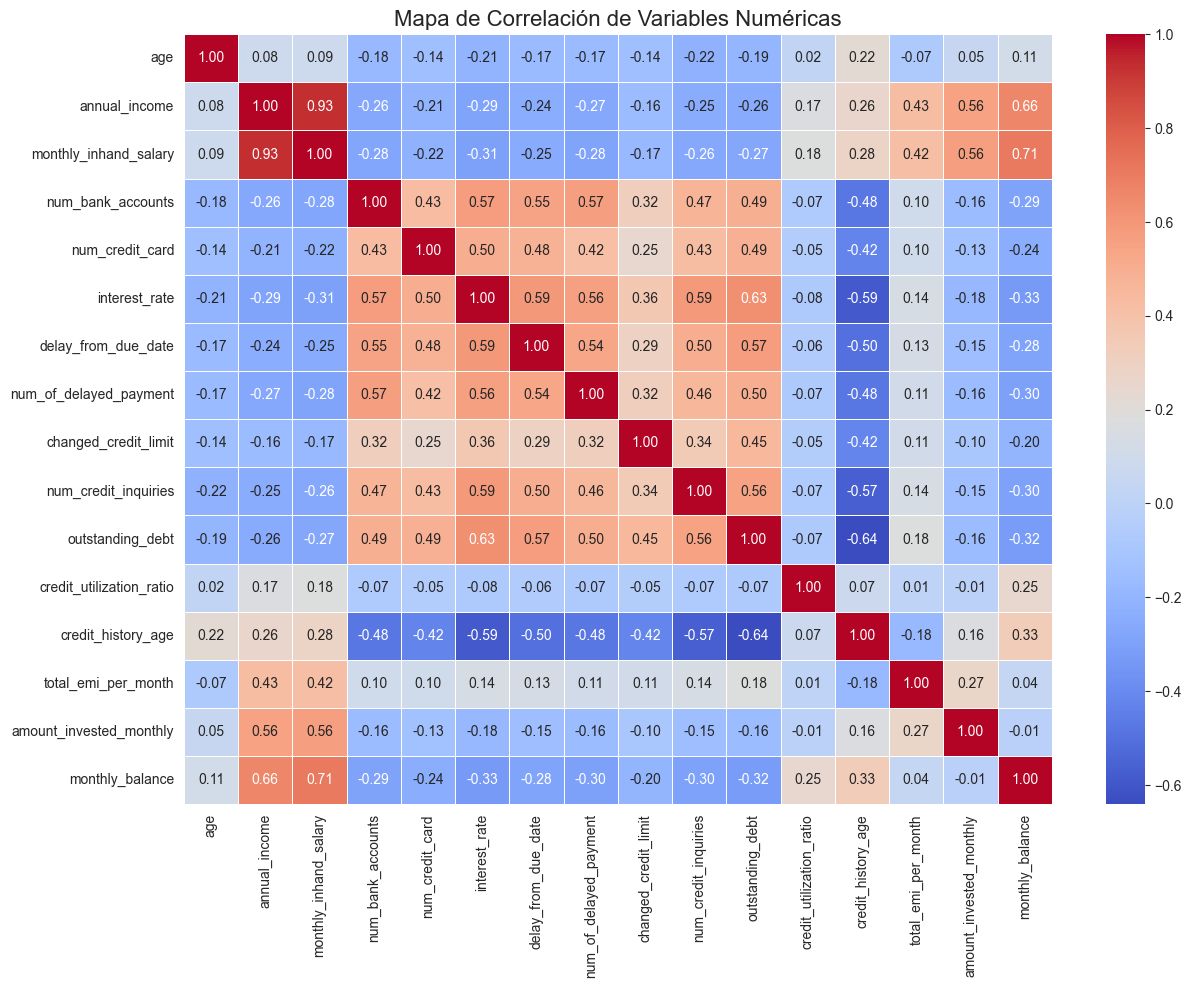

In [443]:
correlation_matrix = df_real[num_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlación de Variables Numéricas', size=16)
plt.show()

Note que ya no existen variables que tengan una correlación significativa entre sí, lo cual nos evita problemas de multicolinealidad más adelante en modelos lineales, y reduce el tamaño del dataset al eliminar columnas enteras redundantes en el mismo.

### 1.8. Conclusión del Análisis Exploratorio de Datos

Nuestro EDA nos ha proporcionado una comprensión esencial de nuestro conjunto de datos:

-   **Preprocesamiento Crucial:** Identificamos la necesidad de limpiar los datos. Encontramos valores nulos en varias columnas, datos inconsistentes (ej. valores negativos en la ingesta de azúcar) y la presencia de outliers.
-   **Desafío del Target:** Confirmamos que la variable objetivo está desequilibrada (70% sanos vs. 30% enfermos).
-   **Descubrimiento de Predictores:**  Variables como `bmi`, `daily_steps`, `income`, `device_usage` y el `exercise_type` emergen como unos buenos predictores para el modelo.
-   **Correlación:** Notamos una correlación significativa en algunas variables relacionadas con el peso y la altura de los individuos.

Para poder usar el dataframe tratado en el análisis exploratorio, lo almacenamos en un `.pkl` en nuestro computador.

In [446]:
df_real.to_pickle("data_limpia.pkl")     